# Concepto de Filtrado

In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

## Señal
En términos generales, las señales biomédicas adquiridas a través de un sensor están contaminadas con ruido inherente al proceso de adquisición. El modelo de ruido aditivo que se muestra en la siguiente ecuación uno de los más utilizados
$$y(t) = \color{blue}{s(t)} + \color{red}{r(t)}$$

Donde $s(t)$ es la señal de interés y que no se encuentra contaminada, mientras que $r(t)$ es la señal de ruido.

En la siguiente ecuación se ejemplifica una señal con ruido de alta frecuencia
$$y(t)=\color{blue}{0.5\, sin(0.6\pi t) + 1.2\, sin(\pi t) - sin(2.2\pi t)} + \color{red}{0.9\,  sin(8\pi t) - 0.8\, sin(11\pi t)}$$

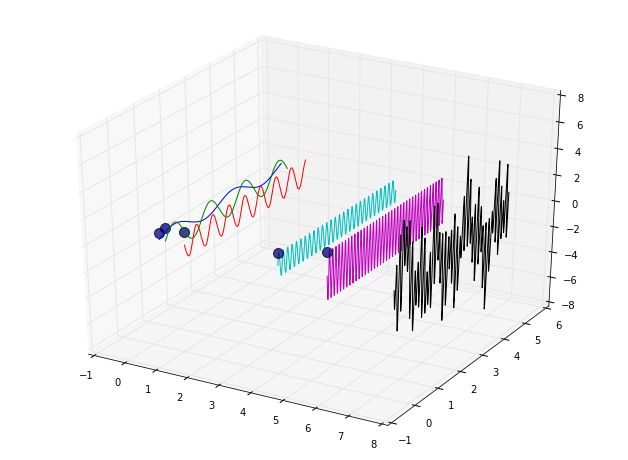

In [35]:
fig = plt.figure(figsize=(11, 8))
ax = fig.gca(projection='3d')

t     = np.linspace(0, 7, 1000)
y     = np.linspace(0, 5, 1000)

M     = np.array( [0.5, 1.2, -1.0, 0.9, -0.8] )
F     = np.array( [0.3, 0.5,  1.1, 4.0,  5.5] )
X, Zx = [], []
Z     = np.zeros(len(t))
for f,m in zip(F,M):
    z     = m*np.sin (2*np.pi*f*t)
    x     = f*np.ones(z.shape[0])
    Z    += z
    X     .append(x[0])
    Zx    .append(z.max())
    ax.plot(x, y, z)


# Plot Sum in time domain
f     = 10.
x     = (F.max()+2)*np.ones(z.shape[0])
ax.plot(x, y, 4*Z/np.pi,color='k')


for i,j in zip(X,Zx):
    ax.scatter([i], [0], [j], c=100, s=100, alpha=.75)

plt.show()

Calculando la señal pura (sin ruido) $s(t)$

In [37]:
z_s = np.zeros( len(t) )
for f,m in zip(F[:-2],M[:-2]):
    z_s += np.sin (2*np.pi*f*t)*m

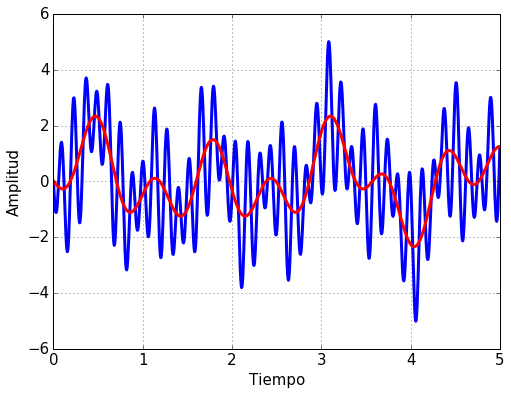

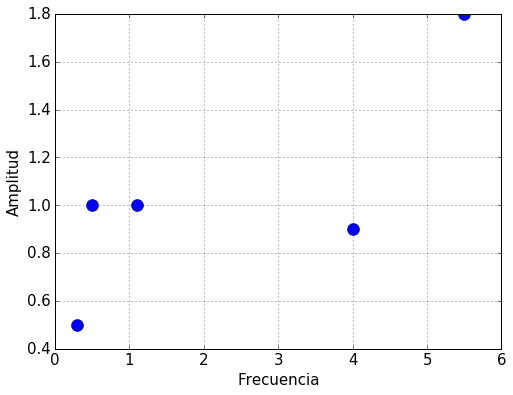

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(y,Z  ,'b',linewidth=3)
plt.plot(y,z_s,'r',linewidth=3)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Amplitud',fontsize=15)
plt.xlabel('Tiempo',fontsize=15)
plt.grid('on')

plt.figure(figsize=(8, 6))
plt.plot(X,Zx,'o',markersize=12)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Amplitud',fontsize=15)
plt.xlabel('Frecuencia',fontsize=15)
plt.grid('on')
plt.grid('on')
plt.show()


La señal $y(t)$ se puede expresar en forma matricial

$$y(t)=\color{blue}{0.5\, sin(0.6\pi t) + 1.2\, sin(\pi t) - sin(2.2\pi t)} + \color{red}{0.9\,  sin(8\pi t) - 0.8\, sin(11\pi t)}$$

$$
    y(t)=
  \begin{bmatrix}
   \color{blue}{
     0.5\\
     1.2\\
     -1.0\\  }
   \color{red}{
     0.9\\
     -0.8  }
  \end{bmatrix}^T \begin{bmatrix}
	\color{blue}{
     sin(0.6\pi t) \\
	 sin(\pi t) \\
	 sin(2.2\pi t) \\  }
    \color{red}{ 
	 sin(8\pi t) \\
	 sin(11\pi t)  }
  \end{bmatrix}$$

De tal forma que el conjunto de senoidales forman un espacio vectorial
$$
    \mathcal{S}=
    \begin{bmatrix}
	\color{blue}{
     sin(0.6\pi t) \\
	 sin(\pi t) \\
	 sin(2.2\pi t) \\  }
    \color{red}{ 
	 sin(8\pi t) \\
	 sin(11\pi t)  }
  \end{bmatrix}$$
  
$$
 \hat{\mathcal{S}}= A^T
  \begin{bmatrix}
	\color{blue}{
     sin(0.6\pi t) \\
	 sin(\pi t) \\
	 sin(2.2\pi t) \\  }
    \color{red}{ 
	 sin(8\pi t) \\
	 sin(11\pi t)  }
  \end{bmatrix}
 =
  \begin{bmatrix}
	\color{blue}{
     sin(0.6\pi t) \\
	 sin(\pi t) \\
	 sin(2.2\pi t)  }
  \end{bmatrix}$$

Una opción es reduciendo directamente la magnitud del las componentes de ruido

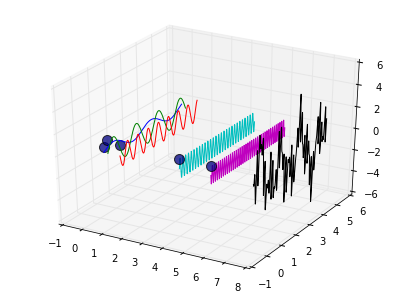

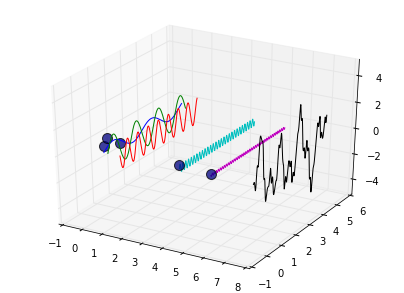

In [48]:
#Espacio con ruido
fig = plt.figure(figsize=(7, 5))
ax = fig.gca(projection='3d')

t     = np.linspace(0, 7, 1000)
y     = np.linspace(0, 5, 1000)

M     = np.array( [0.5, 1.2, -1.0, 0.9, -0.8] )
F     = np.array( [0.3, 0.5,  1.1, 4.0,  5.5] )
X, Zx = [], []
Z     = np.zeros(len(t))
for f,m in zip(F,M):
    z     = m*np.sin (2*np.pi*f*t)
    x     = f*np.ones(z.shape[0])
    Z    += z
    X     .append(x[0])
    Zx    .append(z.max())
    ax.plot(x, y, z)


# Plot Sum in time domain
f     = 10.
x     = (F.max()+2)*np.ones(z.shape[0])
ax.plot(x, y, 4*Z/np.pi,color='k')


for i,j in zip(X,Zx):
    ax.scatter([i], [0], [j], c=100, s=100, alpha=.75)

    

# Espacio con ruido reducido
fig = plt.figure(figsize=(7, 5))
ax1 = fig.gca(projection='3d')

t     = np.linspace(0, 7, 1000)
y     = np.linspace(0, 5, 1000)

M     = np.array( [0.5, 1.2, -1.0, 0.3, -0.1] ) 
F     = np.array( [0.3, 0.5,  1.1, 4.0,  5.5] )
X, Zx = [], []
Z     = np.zeros(len(t))
for f,m in zip(F,M):
    z     = m*np.sin (2*np.pi*f*t)
    x     = f*np.ones(z.shape[0])
    Z    += z
    X     .append(x[0])
    Zx    .append(z.max())
    ax1.plot(x, y, z)


# Plot Sum in time domain
f     = 10.
x     = (F.max()+2)*np.ones(z.shape[0])
ax1.plot(x, y, 4*Z/np.pi,color='k')


for i,j in zip(X,Zx):
    ax1.scatter([i], [0], [j], c=100, s=100, alpha=.75)

plt.show()

La desventaja de hacerlo de esta forma es que se require encontrar el espacio vectorial de senoidales que componen a la señal, eliminar los componentes de ruido y luego recomponer la señal en el dominio del tiempo